In [14]:
import numpy as np
import cv2 as cv
from feature_description.sift_descriptor import SIFTDescriptor
from optical_flow.gu import Gu
from optical_flow.bounding_box import BoundingBox
from matplotlib import pyplot as plt
from tqdm import tqdm

In [15]:
# video_path = "/workspaces/python-opencv/repo/videos/IMG_0165.MOV"
video_path = "/workspaces/python-opencv/repo/videos/jog.mp4"
out_path = "/workspaces/python-opencv/repo/out/gu_test.mp4"
target_size = (360, 640)[::-1]
# params = {"sigma" : 7, "nOctaveLayers":3}
# params = {"sigma" : 7}
params = {"sigma":3, "nOctaveLayers":3, "contrastThreshold":0.03, "edgeThreshold":10}
# target_size = (720, 1280)[::-1]

In [16]:
cap = cv.VideoCapture(video_path)
ret, frame = cap.read()
print(frame.shape)

blur = (1, 1)
frame = cv.resize(frame, target_size, dst = frame)
frame = cv.blur(frame, blur)

# x, y, w, h = 350, 125, 250, 350
x, y, w, h = 645//2, 385//2, 40//2, 100//2
# x, y, w, h = 645, 385, 40, 100
# x, y, w, h = 645//2 + 5 , 385//2 + 12, 40//2 - 5, 100//2 - 20
track_window = (x, y, w, h)

(720, 1280, 3)


In [17]:
fourcc = cv.VideoWriter_fourcc(*'mp4v')
video_out = cv.VideoWriter(out_path, fourcc, 30, target_size)

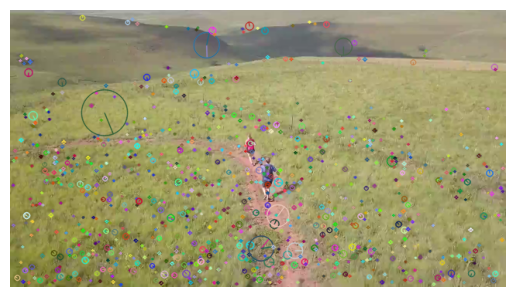

In [18]:
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 
sift = cv.SIFT_create(**params)
kp = sift.detect(gray,None)


test_frame = cv.drawKeypoints(frame, kp, None, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
fig, ax = plt.subplots(figsize=(test_frame.shape[1] / 100, test_frame.shape[0] / 100))
plt.imshow(test_frame[:, :, ::-1])

ax.set_aspect('auto')

ax.axis('off')
plt.show()

In [19]:
bbox = BoundingBox(x, y, w, h)
descriptor = SIFTDescriptor(params=params)

In [20]:
img2 = cv.rectangle(test_frame, (x, y),  (x + w, y + h), 255, 2)
video_out.write(img2)

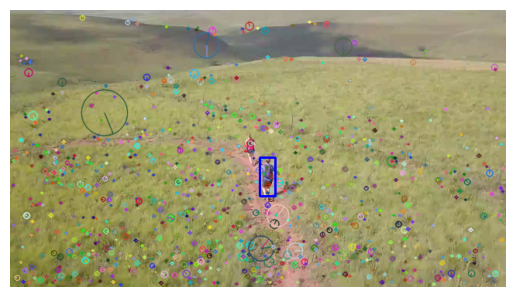

In [21]:
fig, ax = plt.subplots(figsize=(test_frame.shape[1] / 100, test_frame.shape[0] / 100))
plt.imshow(img2[:, :, ::-1])

ax.set_aspect('auto')

ax.axis('off')
plt.show()

In [22]:
gu = Gu(frame, bbox, descriptor, s= 100)

In [23]:
gu._compute_kappa(bbox, bbox)

np.float64(0.0)

In [24]:
gu.track_frame(frame)

(BoundingBox(x=321, y=191, w=21, h=51), np.float64(-13.0))

In [25]:
for i in tqdm(range(150)):
    ret, frame = cap.read()
    
    if not ret:
        break

    frame = cv.resize(frame, target_size, dst = frame)
    frame = cv.blur(frame, blur)
    
    my_bbox, _ = gu.track_frame(frame)

    frame2 = cv.rectangle(frame, (my_bbox.x, my_bbox.y), (my_bbox.x + my_bbox.w, my_bbox.y + my_bbox.h), 255, 2)
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    kp = sift.detect(gray, None)
    frame2 = cv.drawKeypoints(frame2, kp, None, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    video_out.write(frame2)

 53%|█████▎    | 79/150 [10:37<09:33,  8.07s/it]


KeyboardInterrupt: 

In [26]:
cap.release()
video_out.release()
cv.destroyAllWindows()